<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Fall 2018</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: Jan 1, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. You will also write a report (.pdf) which contains your written answers and plots you will produce here. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
        For written questions, your answers have to be in the report as a ".pdf" file.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in both cell output and your ".pdf" file.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the requirements.txt.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        While submitting the homework file, please package your report(".pdf") and notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries install attached "requirements.txt" and run following command in activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

## Question 1 [20 pts]

Assume that you are provided a two hidden layer neural network designed to solve a binary classification problem. This architecture uses ReLU activation function between two hidden layers. You should choose the appropriate activation function of the output layer and loss function for the binary classification problem. Compute the gradients and update the weights only for a single iteration. You DO NOT need to provide any numeric inputs to feed the network to compute gradients. You only need to show derivations for the gradients in backpropagation. Provide a pdf file containing your answer (Hint: you do not need the neuron sizes if you use matrix notation).

## Question 2 [27 pts]

In this question, you will perform multi-class clasification on a gene expression dataset. Specificically, you will implement a neural network with two hidden layers to predict discrete tumor types: BRCA, KIRC, COAD, LUAD and PRAD.
Your features will be continuous gene activity (expression) levels. Download the dataset from the following link:
<br>
https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq. 
See details below.

### Data Loader [4 pts]

An important part of such a task is to implement your own data loader. In this homework, we provide a partial loader for you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below  to create your custom "GEDataset" class which will be able to load your dataset. 
Implement the functions whose proptotypes are given but the bodies are omitted. Follow the TODO notes below. You have to divide the dataset into three sections which are <b>"train (50%)", "validation (20%)" and "test (30%)"</b>. These non-overlapping splits, which are subsets of GEDataset, should be retrieved using the "get_dataset" function. 
<br>
Hint: The dataset is not normalized and your results will heavily depend on your input.



In [146]:
import numpy as np
import pandas as pd
from torch.utils.data.dataset import Dataset

label_to_index = {'BRCA': 0, 'KIRC': 1, 'COAD': 2, 'LUAD':3, 'PRAD':4}
index_to_label = {v:k for k,v in label_to_index.items()}

#https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
class GEDataset(Dataset):
    
    # Define constructor for GEDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, **kwargs):
        self.data = kwargs['data']
        self.labels = kwargs['labels']
        self.labels = list(map(lambda item: label_to_index[item], self.labels))
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.data[index]
        _y = self.labels[index]
        return _x, _y


def get_dataset(root):
    # Read dataset files from "data/Q1" folder
    data = np.genfromtxt(root + "data/Q1/" + "data.csv", delimiter=",")
    data = data[1:, 1:]
    labels = pd.read_csv(root + "data/Q1/" + "labels.csv")
    labels = labels.values[:,1]
    
    # Split dataset samples into the 3 part for training, validation and test
    
    train_dataset = data[0:int(len(data)*0.5)]
    val_dataset = data[int(len(data)*0.5):int(len(data)*0.7)]
    test_dataset = data[int(len(data)*0.7):]
    
    # Normalize datasets
    train_dataset = np.apply_along_axis(normalize_data, 0, train_dataset)
    val_dataset = np.apply_along_axis(normalize_data, 0, val_dataset)
    test_dataset = np.apply_along_axis(normalize_data, 0, test_dataset)
    
    kwargs = {'data': train_dataset, 'labels': labels[0:int(len(labels)*0.5)]}
    train_dataset = GEDataset(**kwargs)
    
    kwargs = {'data': val_dataset, 'labels': labels[int(len(labels)*0.5):int(len(labels)*0.7)]}
    val_dataset = GEDataset(**kwargs)
    
    kwargs = {'data': test_dataset, 'labels': labels[int(len(labels)*0.7):]}
    test_dataset = GEDataset(**kwargs)
    
    return train_dataset, val_dataset, test_dataset

def normalize_data(column):
    mean = np.mean(column)
    std = np.std(column)
    if std == 0.0:
        return column
    return (column - mean) / std

### Neural Network (5 pts)

Now implement your two hidden layer neural network. GENet class will represent your neural network. First hidden layer will contain 64 neurons and second hidden layer will contain 32 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. Implement the functions with missing bodies.

In [147]:
import torch
import torch.nn as nn

class GENet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # You should create your neural network here
        super(GENet, self).__init__()
        self.hidden1 = nn.Sequential(
            nn.Linear(20531, 64),
            nn.ReLU())
        self.hidden2 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU())
        self.output = nn.Sequential(
            nn.Linear(32, 5))
     
    def forward(self, X): # you can add any additional parameters you want
    # Forward propagation implementation should be here
        out = self.hidden1(X)
        out = self.hidden2(out)
        out = self.output(out)
        return out

### Training (7 pts)

Complete below code snippet to train your network. You need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing above. Note that you will not do cross validation. You will need to load these splits at this phase. Make sure that you shuffle the samples in the training split. Plot training loss and training accuracy of each iteration (each batch). Also plot validation loss and accuracy at each epoch. Use matplotlib library for plotting. Your model is going to run upto the max epoch parameter. Pick the best model so far as your resulting model. You need to save this model in a ".pth" file. 

In [148]:
train_dataset, val_dataset, test_dataset = get_dataset("./")

In [149]:
from torch.utils.data import DataLoader
import time
#HINT: note that your training time should not take many days.

#Pick your hyper parameters
max_epoch = 8
train_batch = 64
val_batch = 32
test_batch = 48
learning_rate = 0.001

#use_gpu = torch.cuda.is_available()

# Inspired from: https://github.com/pytorch/examples/blob/master/imagenet/main.py
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def main(train_results, val_results): # you are free to change parameters
    
    # Create train dataset loader
    trainloader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
    
    # Create validation dataset loader
    val_loader = DataLoader(val_dataset, batch_size=val_batch)
    
    # initialize your GENet neural network
    model = GENet()
    
    # define your loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0
    best_path = "genet_best_model.pth"
    for epoch in range(max_epoch):
        res = train(epoch, model, criterion, optimizer, trainloader)
        train_results.append(res)
        res = test(model, val_loader, criterion)
        acc = res[0]
        val_results.append(res)
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), best_path)

''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    t1 = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        data_time.update(time.time() - t1)
        
        # Implement training code for a one iteration
        
        output = model(data.float())
        loss = criterion(output, labels)
        _, predicted = torch.max(output, 1)
        acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
        accuracies.update(acc, data.size(0))
        losses.update(loss.item(), data.size(0))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_time.update(time.time() - t1)
        t1 = time.time()
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))
    
    return accuracies.avg, losses.avg


''' Test&Validate your network '''
def test(model, loader, criterion): # you are free to change parameters

    model.eval()
    
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    with torch.no_grad():
        t1 = time.time()
        for batch_idx, (data, labels) in enumerate(loader):
            # Implement test code
            output = model(data.float())
            loss = criterion(output, labels)
            _, predicted = torch.max(output, 1)
            acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
            accuracies.update(acc, data.size(0))
            losses.update(loss.item(), data.size(0))
            
            batch_time.update(time.time() - t1)
            t1 = time.time()
            
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'
              'Loss {loss.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies,
               loss=losses))
        
        return accuracies.avg, losses.avg

### Plotting Your Results [4 pts]

For us to assess if your model has learnt as expected, you have to provide training loss, training accuracy, validation loss and validation accuracy plots. You need to provide two distinct plots, one demonstrating training and validation loss scores and the other demonstrating training and validation accuracies.

Epoch: [1][1/7]	Time 0.036 (0.036)	Data 0.0218 (0.0218)	Loss 1.6082 (1.6082)	Accu 0.1719 (0.1719)	
Epoch: [1][2/7]	Time 0.036 (0.036)	Data 0.0239 (0.0228)	Loss 1.5902 (1.5992)	Accu 0.2656 (0.2188)	
Epoch: [1][3/7]	Time 0.031 (0.034)	Data 0.0209 (0.0222)	Loss 1.5887 (1.5957)	Accu 0.2656 (0.2344)	
Epoch: [1][4/7]	Time 0.030 (0.033)	Data 0.0210 (0.0219)	Loss 1.5607 (1.5870)	Accu 0.3594 (0.2656)	
Epoch: [1][5/7]	Time 0.031 (0.033)	Data 0.0204 (0.0216)	Loss 1.5260 (1.5748)	Accu 0.5312 (0.3187)	
Epoch: [1][6/7]	Time 0.028 (0.032)	Data 0.0180 (0.0210)	Loss 1.5166 (1.5651)	Accu 0.5156 (0.3516)	
Epoch: [1][7/7]	Time 0.015 (0.029)	Data 0.0083 (0.0192)	Loss 1.4739 (1.5614)	Accu 0.6250 (0.3625)	
Time 0.010	Accu 0.7812	Loss 1.4340	
Epoch: [2][1/7]	Time 0.031 (0.031)	Data 0.0208 (0.0208)	Loss 1.4209 (1.4209)	Accu 0.8750 (0.8750)	
Epoch: [2][2/7]	Time 0.031 (0.031)	Data 0.0210 (0.0209)	Loss 1.3839 (1.4024)	Accu 0.9375 (0.9062)	
Epoch: [2][3/7]	Time 0.030 (0.031)	Data 0.0203 (0.0207)	Loss 1.3251 (1.37

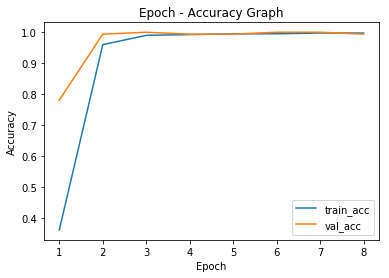

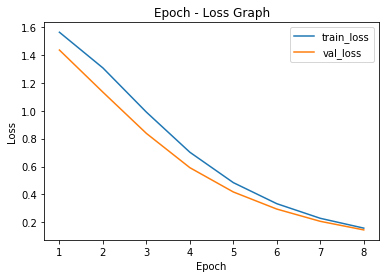

In [150]:
import matplotlib.pyplot as plt

# write your code in this cell to plot your results
train_res = list()
val_res = list()
main(train_res, val_res)

train_acc, train_loss = zip(*train_res)
val_acc, val_loss = zip(*val_res)

plt.plot(range(1, max_epoch+1), train_acc, label="train_acc")
plt.plot(range(1, max_epoch+1), val_acc, label="val_acc")
plt.title("Epoch - Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(range(1, max_epoch+1), train_loss, label="train_loss")
plt.plot(range(1, max_epoch+1), val_loss, label="val_loss")
plt.title("Epoch - Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Testing [7 pts]

You will test your final model with test dataset in this section. You should provide confusion matrix as deliverable. Report confusion matrix in your pdf file.

In [151]:
# write your code in this cell to test your best model with the test dataset
# Create test dataset loader
testloader = DataLoader(test_dataset, batch_size=test_batch)

best_path = "genet_best_model.pth"
model = GENet()
checkpoint = torch.load(best_path)
if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
    model.load_state_dict(checkpoint['state_dict'])
else:
    model.load_state_dict(checkpoint)
    
batch_time = AverageMeter()
accuracies = AverageMeter()

labels_list = list()
predictions_list = list()

with torch.no_grad():
    t1 = time.time()
    for batch_idx, (data, labels) in enumerate(testloader):
        # Implement test code
        output = model(data.float())
        _, predicted = torch.max(output, 1)
        labels_list.append(list(np.asarray(labels)))
        predictions_list.append(list(np.asarray(predicted)))
        acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
        accuracies.update(acc, data.size(0))

        batch_time.update(time.time() - t1)
        t1 = time.time()

    print('Time {batch_time.avg:.3f}\t'
          'Accu {acc.avg:.4f}\t'.format(
           batch_time=batch_time, 
           acc=accuracies))

confusion_matrix = np.asarray([[0,0,0,0,0] for i in range(0,5)])
predictions_list = [item for sublist in predictions_list for item in sublist]
labels_list = [item for sublist in labels_list for item in sublist]

for item in range(len(predictions_list)):
    i = predictions_list[item]
    j = labels_list[item]
    confusion_matrix[i][j] += 1

print()
print("\t\t\tActual\n")
row_str = "\t"
for index in index_to_label:
    row_str += index_to_label[index] + "\t"
print(row_str)

for i, row in enumerate(confusion_matrix):
    row_str = index_to_label[i] + "\t"
    for item in row:
        row_str += " " + str(item) + "\t"
    if i == 2:
        row_str += "Predicted"
    print(row_str)

Time 0.011	Accu 0.9834	

			Actual

	BRCA	KIRC	COAD	LUAD	PRAD	
BRCA	 92	 0	 0	 1	 0	
KIRC	 0	 42	 0	 0	 0	
COAD	 0	 0	 22	 0	 0	Predicted
LUAD	 0	 0	 2	 41	 0	
PRAD	 1	 0	 0	 0	 40	


## Question 3 [53 pts]

In this question, you will train a neural networks to recognize house numbers from images. You will use the dataset at the following link: http://ufldl.stanford.edu/housenumbers/. You are actually asked to predict the number in the middle (i.e., for 173, predict 7). Images are cropped accordingly and correct labels are given in the dataset. You do not need to worry about other numbers that might still be visible in the image. You have to use <b>train_32x32.mat</b> and <b>test_32x32.mat</b> from <b>the CROPPED version (FORMAT2)</b>. All images in this dataset have the following dimensions: 32x32x3. You will solve this problem using two architectures: (1) Using a MLP and (2) Using a CNN.

### 3.1. Multi Layer Perceptron (MLP) [23 pts]

#### DataLoader [3 pts]

In this part, you will train an MLP. Here, you are supposed to flatten the image into a vector (also to grayscale). Note that the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset) as you did in Question 2. For this question, do not perform cross validation also do not use validation split. Note that training and test splits are given to you in the provided link. 

In [191]:
import scipy.io as sio
#http://ufldl.stanford.edu/housenumbers/
class SVHNDataset(Dataset):
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data, labels): # you are free to change parameters
        self.data = data
        self.labels = labels
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.data[index]
        _y = self.labels[index]
        return _x, _y

def rgb2gray(rgb):
    r = rgb[:,:,0]
    g = rgb[:,:,1]
    b = rgb[:,:,2]
    return r*0.299 + g*0.587 + b*0.114

def normalize_array(img):
    minn = min(img)
    maxx = max(img)
    img = np.asarray([(x - minn)/(maxx - minn) for x in img])
    return img

def process_image(img):
    img = rgb2gray(img)
    img = img.flatten()
    img = normalize_array(img)
    return img

def get_dataset(root): #you are free to change parameters
    # Read dataset files from "data/Q2" folder
    # Normalize datasets
    train = sio.loadmat(root + "data/Q2/train_32x32.mat")
    train_label = train['y'].T[0]
    print(len(train_label))
    train_label = np.asarray(list(map(lambda x: 0 if x == 10 else x, train_label)))
    print(len(train_label))
    
    train_data = train['X']
    processed_train_data = list()
    for i in range(train_data.shape[3]):
        img = train_data[:,:,:,i]
        img = process_image(img)
        processed_train_data.append(img)
    
    train_data = np.asarray(processed_train_data)
    train_dataset = SVHNDataset(train_data, train_label)
    
    test = sio.loadmat(root + "data/Q2/test_32x32.mat")
    test_label = test['y'].T[0]
    test_label = np.asarray(list(map(lambda x: 0 if x == 10 else x, test_label)))
    
    test_data = test['X']
    processed_test_data = list()
    for i in range(test_data.shape[3]):
        img = test_data[:,:,:,i]
        img = process_image(img)
        processed_test_data.append(img)
    
    test_data = np.asarray(processed_test_data)
    test_dataset = SVHNDataset(test_data, test_label)
    
    return train_dataset, test_dataset

#### Neural Network [4 pts]

Now implement your two hidden layered neural network. FCNet class will represent your neural network. First hidden layer will contain 256 neurons and second hidden layer will contain 256 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. 

In [193]:
class FCNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # You should create your neural network here
        super(FCNet, self).__init__()
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU())
        self.hidden2 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU())
        self.output = nn.Sequential(
            nn.Linear(256, 10))
     
    def forward(self, X): # you can add any additional parameters you want
    # Forward propagation implementation should be here
        out = self.hidden1(X)
        out = self.hidden2(out)
        out = self.output(out)
        return out

#### Training and Testing [10 pts]

Now, train your network. You need to select the appropriate loss function. You need to select appropriate hyper-parameters' values. Make sure that you shuffle the samples in the training split. Note that you will not do cross validation. Plot the training loss and accuracy for each iteration. Plot the test loss and accuracy for each epoch. Your model is going to run upto the max epoch parameter. Pick the best model as your resulting model. You need to save this model in a ".pth" file. (HINT: note that your training time should not take many days.)

In [194]:
fc_train_dataset, fc_test_dataset = get_dataset("./")

73257
73257


In [201]:
# TODO:
# Pick your hyper parameters
max_epoch = 5
train_batch = 256
test_batch = 128
learning_rate = 0.01

#use_gpu = torch.cuda.is_available()
def main(train_results): # you are free to change parameters

    # Create train dataset loader
    # Create validation dataset loader
    # Create test dataset loader
    # initialize your GENet neural network
    # define your loss function
    train_loader = DataLoader(fc_train_dataset, batch_size=train_batch, shuffle=True)
    test_loader = DataLoader(fc_test_dataset, batch_size=test_batch)
    
    model = FCNet()
    criterion = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0
    best_path = "fcnet_best_model.pth"
    for epoch in range(max_epoch):
        res = train(epoch, model, criterion, optimizer, train_loader)
        train_results.append(res)
        res = test(model, test_loader, criterion)
        acc = res[0]
        if acc > best_acc:
           torch.save(model, best_path)
    
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    t1 = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration
        print(batch_idx)
        print(len(labels))
        output = model(data.float())
        labels = labels.long()
        loss = criterion(output, labels)
        _, predicted = torch.max(output, 1)
        acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
        accuracies.update(acc, data.size(0))
        losses.update(loss.item(), data.size(0))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_time.update(time.time() - t1)
        t1 = time.time()
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))

        return accuracies.avg, losses.avg  

''' Test&Validate your network '''
def test(model, loader, criterion): # you are free to change parameters

    model.eval()
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    with torch.no_grad():
        t1 = time.time()
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code
            output = model(data.float())
            labels = labels.long()
            print(len(labels))
            loss = criterion(output, labels)
            _, predicted = torch.max(output, 1)
            acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
            accuracies.update(acc, data.size(0))
            losses.update(loss.item(), data.size(0))
            
            batch_time.update(time.time() - t1)
            t1 = time.time()
            
            
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies))
    
    return accuracies.avg, losses.avg

In [202]:
train_results = list()
main(train_results)

0
128
Epoch: [1][1/204]	Time 0.008 (0.008)	Data 0.0000 (0.0000)	Loss 2.3139 (2.3139)	Accu 0.1094 (0.1094)	
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
48
Time 0.003	Accu 0.0824	
0
128
Epoch: [2][1/204]	Time 0.006 (0.006)	Data 0.0000

/Users/gokberkkaraca/anaconda3/envs/HW3/lib/python3.7/site-packages/torch/serialization.py:250: UserWarning: Couldn't retrieve source code for container of type FCNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
48
Time 0.003	Accu 0.0900	
0
128
Epoch: [3][1/204]	Time 0.006 (0.006)	Data 0.0000 (0.0000)	Loss 2.3014 (2.3014)	Accu 0.1172 (0.1172)	
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
12

#### Weight Visualization [6 pts]

For the best model, extract the learned weights from first hidden layer. Visualize learned weights for each neuron of the first hidden layer as an image. Show these images in a grid and add this grid in the pdf file as well. 

In [ ]:
# write your code in this cell to visualize first hidden layer weights. Produce your figure here.

### 3.2. Convolutional Neural Network (CNN) [30 pts]

#### DataLoader [3 pts]

In this part, you will train a CNN for the same problem. Again, the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset). Note that now you do not need to flatten the image. Again, for this question, do not perform cross validation. Also, just like 3.1., do not use a validation split. Use the same splits as in 3.1. 

In [ ]:
# http://ufldl.stanford.edu/housenumbers/
class SVHNDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    #def __init__(self, **kwargs): # you are free to change parameters
        
    '''This function should return sample count in the dataset'''
    #def __len__(self):
    #    return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    #def __getitem__(self, index):
        #return _x, _y

        
def get_dataset(root): # you are free to change parameters
    # TODO: 
    # Read dataset files from "data/Q2" folder
    # Normalize datasets
    
    #return train_dataset, test_dataset

#### Neural Network [9 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 32 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 64 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 128 filters with size of 3 x 3 with stride 1 and no padding, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As a classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes for the classification (linear) layer.

In [ ]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
     
    def forward(self, X): # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here

#### Training and Testing [10 pts]

Now, train your network. You need to select the appropriate loss function. You need to select your hyper-parameters. Make sure that you shuffle the samples in the training split. Note that you will not do cross validation. Plot the training loss and accuracy for each iteration. Plot the test loss and accuracy for each epoch. Your model is going to run upto the max epoch parameter. Pick the best model as your resulting model. You need to save this model in a ".pth" file. Report the validation performance change between MLP and CONV neural network and explain the reason for this change. You need to add this explanation and your plots into the pdf file.

In [ ]:

# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
# max_epoch = 
# train_batch = 
# test_batch = 
# learning_rate =

#use_gpu = torch.cuda.is_available()


def main(): # you are free to change parameters

    # Create train dataset loader
    # Create validation dataset loader
    # Create test dataset loader
    # initialize your GENet neural network
    # define your loss function
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    #for epoch in range(max_epoch):
    #    train(epoch, model, criterion, optimizer, trainloader)
    #    acc = test(model, val_loader)
    #    if acc > best_acc:
    #       torch.save(model, best_path)
    
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()

    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(trainloader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))


''' Test&Validate your network '''
def test(model, loader): # you are free to change parameters

    model.eval()

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(testloader):
            # TODO:
            # Implement test code
            
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies))


#### Weight Visualization [8 pts]

For the best convolutional model you obtained, extract the learnt weights from the first convolutional layer. Visualize each learnt filter of the first convolutional layer as an image. Show these images in a grid and add this grid in to the pdf file as well.

In [ ]:
# write your code in this cell to visualize filters of the first convolutional layer 

## BONUS: Question 4 [20 pts]

The learnt weights of a network that has been trained to solve a problem can be used as a starting point for the weights of neural networks that will be used to solve another similar problem. Instead of random initialization for the weights of the neural networks, using the weights of the neural network trained to solve a similar problem will make learning easier. This approach is called <b>"Transfer Learning"</b>.

#### Dataset

For this question, you will use CIFAR10 dataset. You can find detailed information about the dataset from https://www.cs.toronto.edu/~kriz/cifar.html. Torchvision library provides a ready-to-use data loader for the CIFAR10 dataset. You <b>DO NOT</b> need to implement your custom data loader for this question. You can easily split the dataset into training and test. Just set the "train" parameter of the constructor of torchvision.datasets.CIFAR10 class.  You will the use test split as the validation set at each epoch.

#### Model

You have to use AlexNet convolutional neural network which is one of the most basic CNN models. You <b>DO NOT</b> need to implement your own AlexNet architecture. Torchvision has also a model zoo which contains commonly used CNN models including AlexNet. Therefore, you need to use the AlexNet model from the Torchvision library. For the question 4.2 Transfer Learning part, you will need to transfer pretrained network weights as a starting point. These weights will come from the result of the training with Imagenet dataset. These will be loaded automatically when you set the "pretrained" parameter to true (check the hints in the code). Otherwise, weights will be randomly initialized.

### 4.1 Random Initialization 

#### 4.1.1 Train & Validation 

You have to train randomly initialized AlexNet CNN model using CIFAR10 dataset. At the end of each epoch, you should evaluate your network with the test split. Print (not plot) training loss, training accuracy, validation loss and validation accuracy values for each epoch. When the training is completed, print the best validation score that you have obtained during training. Report this score in your pdf file as well. You will compare this score with the result of the next question. Note that this might take a long time because of randomly initilized weights. Stop training when validation score converges.

In [ ]:
# write your code in this cell to train your network that has randomly selected weights

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=False) 
# torchvision.models.alexnet(pretrained=False) will return an alexnet model instance with randomly initialized weights
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.1.2 Kernel Output Visualization

You have trained AlexNet which has randomly initialized weights by using the CIFAR10 dataset. Now you have to plot the output of the each filter at the first convolution layer as an image by using randomly selected single validation image. Merge each image obtained from the corresponding kernel in a squared grid format. Add your plot in to the pdf file as well.

In [ ]:
# write your code in this cell to visualize output of the each filter at the first conv layer

### 4.2 Transfer Learning

#### 4.2.1 Train & Validation 

In this case, you have to train ImageNet pretrained AlexNet model for the CIFAR10 dataset. At the end of each epoch, you should evaluate your network with test split. Print training loss, training accuracy, validation loss and validation accuracy values for each epoch as an output of below cell. Report the best validation accuracy score. Compare validation scores that are obtained from these two different training approaches. Add your explanations to the pdf file.

In [ ]:
# write your code in this cell to train your network using transfer learning approach

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=True) 
# torchvision.models.alexnet(pretrained=True) will return an alexnet model instance with ImageNet pretrained network weights.
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.2.2 Kernel Output Visualization

You have trained AlexNet which is pretrained with ImageNet dataset for the CIFAR10 dataset. For this network, you have to plot the output of each filter at the first convolution layer as an image by using the same image that has picked 4.1.3 section. Merge each image obtained from the corresponding kernel in a squared grid format. Explain what these outputs mean. Compare your plot with the obtained from 4.1.2. You need to add your discussions and plot into the pdf file as well.

In [ ]:
# write your code in this cell to visualize output of the each filter at the first conv layer